In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
plt.style.use('classic')

%matplotlib inline

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
# Replace the numbers in categorical variables with the actual labels in the origin col
df['Purchased'] = df['Purchased'].replace({1: 'Purchased', 0:'NPurchased'})

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,NPurchased
1,15810944,Male,35,20000,NPurchased
2,15668575,Female,26,43000,NPurchased
3,15603246,Female,27,57000,NPurchased
4,15804002,Male,19,76000,NPurchased
...,...,...,...,...,...
395,15691863,Female,46,41000,Purchased
396,15706071,Male,51,23000,Purchased
397,15654296,Female,50,20000,Purchased
398,15755018,Male,36,33000,NPurchased


In [7]:
df = pd.get_dummies(df, columns=['Purchased'])

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased_NPurchased,Purchased_Purchased
0,15624510,Male,19,19000,1,0
1,15810944,Male,35,20000,1,0
2,15668575,Female,26,43000,1,0
3,15603246,Female,27,57000,1,0
4,15804002,Male,19,76000,1,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,0,1
396,15706071,Male,51,23000,0,1
397,15654296,Female,50,20000,0,1
398,15755018,Male,36,33000,1,0


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased_NPurchased,Purchased_Purchased
0,15624510,Male,19,19000,1,0
1,15810944,Male,35,20000,1,0
2,15668575,Female,26,43000,1,0
3,15603246,Female,27,57000,1,0
4,15804002,Male,19,76000,1,0


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased_NPurchased,Purchased_Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.642500,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased_NPurchased,400.0,6.425000e-01,0.479864,0.0,0.00,1.0,1.0,1.0
Purchased_Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [12]:
print(df.dtypes)

User ID                  int64
Gender                  object
Age                      int64
EstimatedSalary          int64
Purchased_NPurchased     uint8
Purchased_Purchased      uint8
dtype: object


In [13]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased_NPurchased,Purchased_Purchased
0,15624510,0,19,19000,1,0
1,15810944,0,35,20000,1,0
2,15668575,1,26,43000,1,0
3,15603246,1,27,57000,1,0
4,15804002,0,19,76000,1,0
...,...,...,...,...,...,...
395,15691863,1,46,41000,0,1
396,15706071,0,51,23000,0,1
397,15654296,1,50,20000,0,1
398,15755018,0,36,33000,1,0


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400.0,5.100000e-01,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased_NPurchased,400.0,6.425000e-01,0.479864,0.0,0.00,1.0,1.0,1.0
Purchased_Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [15]:
df_attr = df.iloc[:, 0:10]

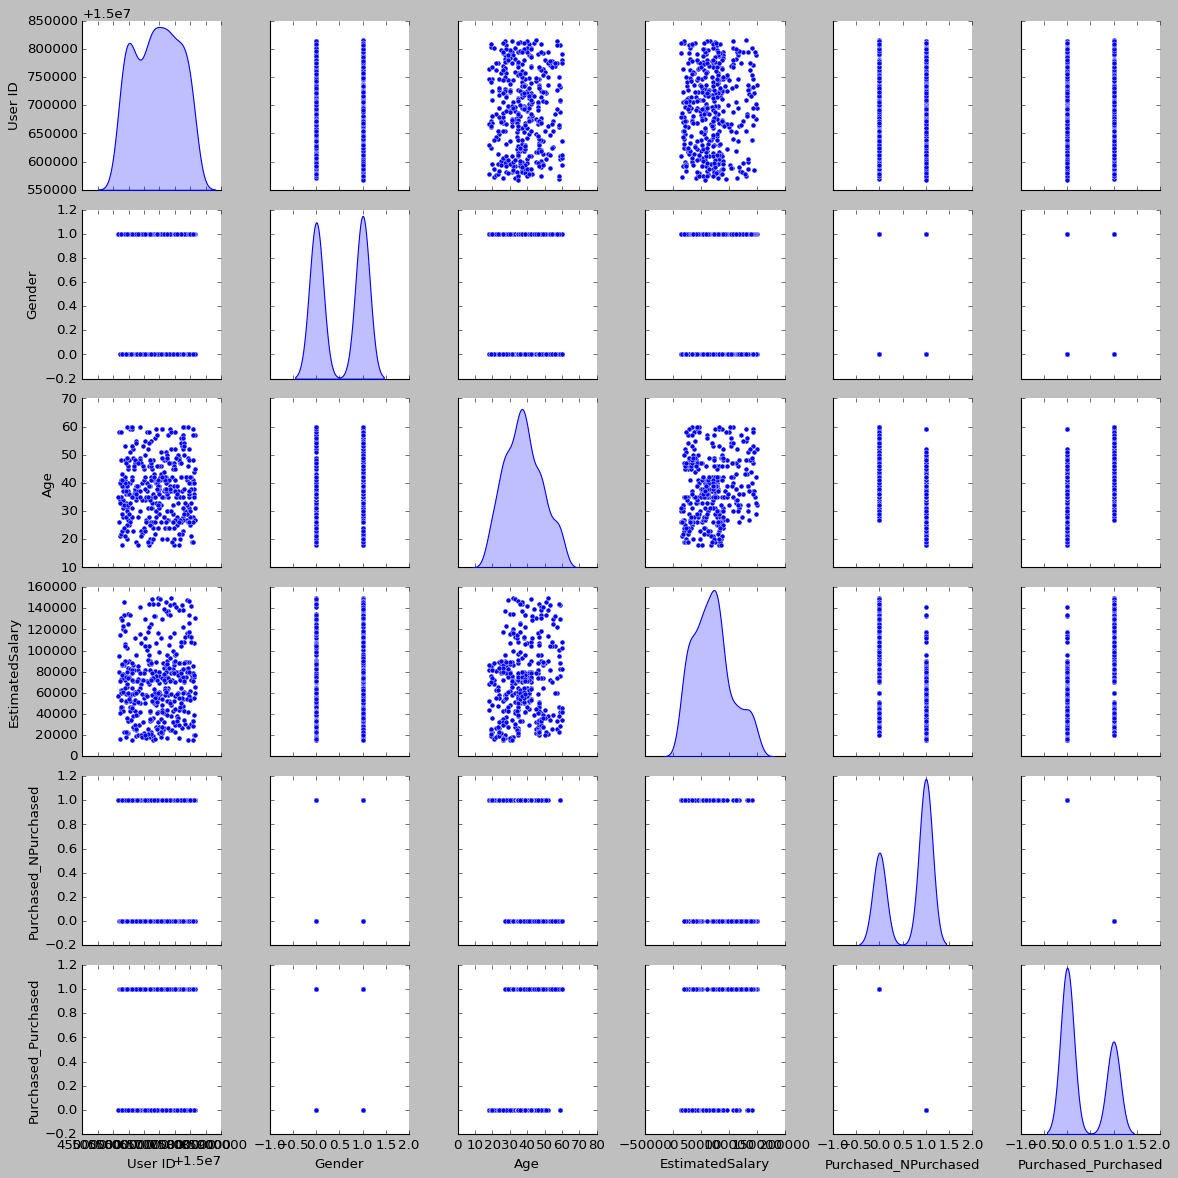

In [16]:
sns.pairplot(df_attr, diag_kind='kde') 

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

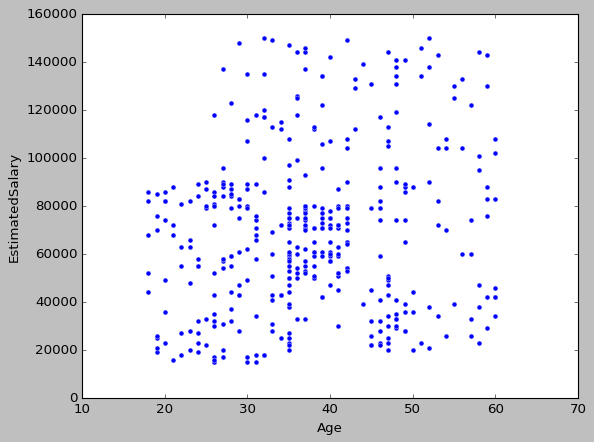

In [17]:
import seaborn as sns
sns.scatterplot(data=df,x="Age",y="EstimatedSalary")

In [18]:
print(df['Age'].corr(df['EstimatedSalary']))

0.15523801797209996


In [19]:
X = df.drop('EstimatedSalary', axis=1)
X = X.drop({'Purchased_NPurchased', 'Purchased_Purchased'}, axis=1)

In [20]:
y = df[['EstimatedSalary']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [23]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for User ID is 0.04462838078170293
The coefficient for Gender is 2019.616104528166
The coefficient for Age is 588.8245348440062


In [25]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -654271.689288249


In [26]:
regression_model.score(X_train, y_train)

0.04306237266039736

In [27]:
regression_model.score(X_test, y_test)

-0.00666168017194213

In [28]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

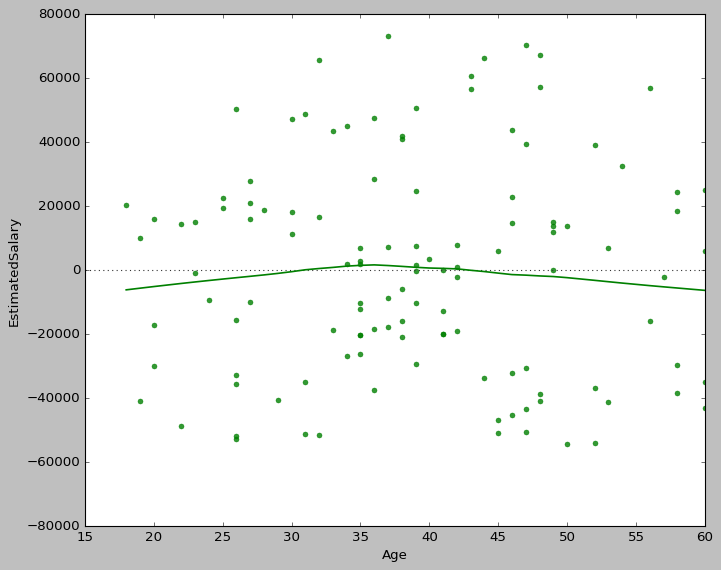

In [29]:

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test['Age'], y=y_test['EstimatedSalary'], color='green', lowess=True)

In [51]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,User ID,Gender,Age,EstimatedSalary
39,1.275226,0.980196,-1.017692,-1.137668
167,-1.071876,0.980196,-0.253587,0.036926
383,0.224878,-1.020204,1.083596,-1.225763
221,-0.396525,-1.020204,-0.253587,0.624223
351,-1.400902,-1.020204,-0.062561,0.154386


In [52]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'EstimatedSalary ~ Gender+Age', data = data_train).fit()
lm1.params

Intercept   -0.010027
Gender       0.033634
Age          0.182335
dtype: float64

In [53]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     4.898
Date:                Thu, 01 Jun 2023   Prob (F-statistic):            0.00812
Time:                        11:16:01   Log-Likelihood:                -394.18
No. Observations:                 280   AIC:                             794.4
Df Residuals:                     277   BIC:                             805.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0100      0.060     -0.169      0.8

In [54]:
mse = np.mean((regression_model.predict(X_test) - y_test)**2)

C:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [55]:
mse

EstimatedSalary    0.97399
dtype: float64

In [56]:
import math

math.sqrt(mse)

0.9869095622777564

In [57]:
y_pred = regression_model.predict(X_test)

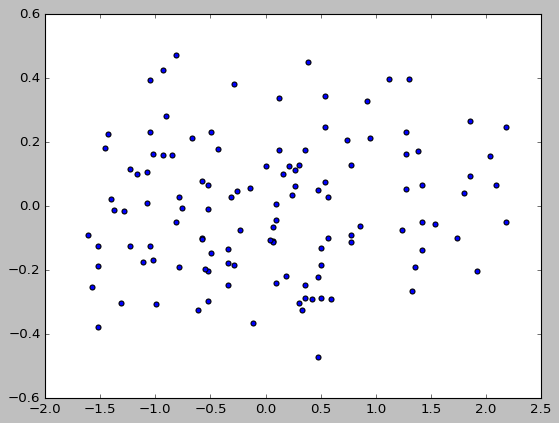

In [58]:
plt.scatter(y_test['EstimatedSalary'], y_pred)

In [59]:
from scipy.stats import zscore

mpg_df_scaled = df.apply(zscore)

In [60]:
X = mpg_df_scaled.drop('EstimatedSalary', axis=1)
X = X.drop({'Purchased_NPurchased', 'Purchased_Purchased'}, axis=1)

# copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_scaled[['EstimatedSalary']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [62]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for User ID is 0.0937912011866782
The coefficient for Gender is 0.029646937465194007
The coefficient for Age is 0.18103006500021027


In [64]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.015386769820289838


In [65]:
regression_model.score(X_test, y_test)

-0.006661680171942352

In [66]:
mse = np.mean((regression_model.predict(X_test) - y_test)**2)

C:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [67]:
mse

EstimatedSalary    0.97399
dtype: float64

In [47]:
import math

math.sqrt(mse)

0.9869095622777564

In [48]:
y_pred = regression_model.predict(X_test)

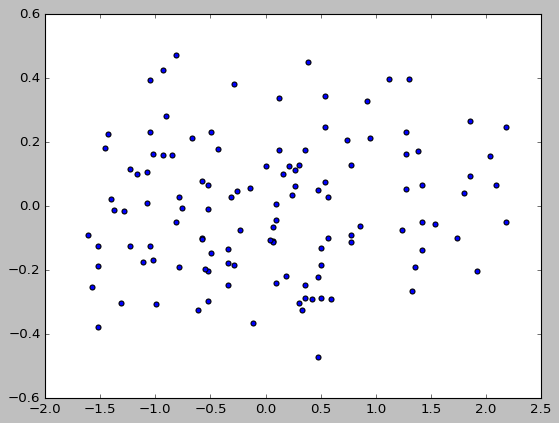

In [49]:
plt.scatter(y_test['EstimatedSalary'], y_pred)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

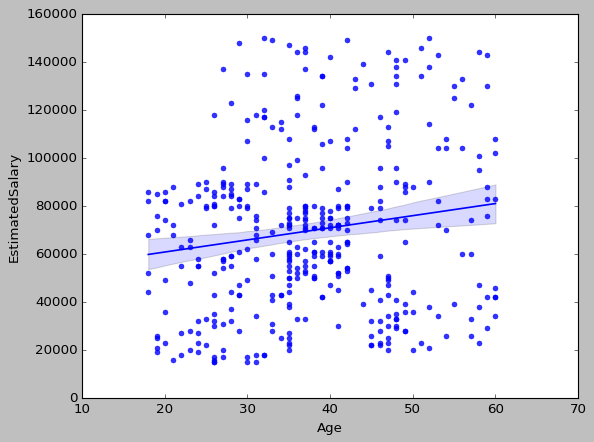

In [50]:
import seaborn as sns
sns.regplot(x = "Age",
            y = "EstimatedSalary",
            data = df)